## Exploratory Data Analysis: weather dataset

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics 

### Read .csv file and write it in a dataframe named *df_weather_by_hour*

In [17]:
df_weather_by_hour = pd.read_csv('all_weather_by_hour_v2.csv')
df_weather_by_hour['city_timezone'] = df_weather_by_hour['city_timezone'].replace(['Europe/Kiev'], 'Europe/Kyiv')
df_weather_by_hour.head()

,city_latitude,city_longitude,city_resolvedAddress,city_address,city_timezone,city_tzoffset,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,...,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,hour_icon,hour_source,hour_stations
0,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kyiv,2.0,2022-02-24,1645653600,4.9,0.7,...,0.0,91.5,0.0,NaN,0.0,10.0,Overcast,snow,obs,remote
1,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kyiv,2.0,2022-02-24,1645653600,4.9,0.7,...,0.2,88.2,0.0,NaN,0.0,10.0,Partially cloudy,fog,obs,remote
2,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kyiv,2.0,2022-02-24,1645653600,4.9,0.7,...,10.0,100.0,NaN,NaN,NaN,10.0,Overcast,cloudy,obs,33177099999
3,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kyiv,2.0,2022-02-24,1645653600,4.9,0.7,...,0.1,92.0,0.0,NaN,0.0,10.0,Overcast,fog,obs,remote
4,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kyiv,2.0,2022-02-24,1645653600,4.9,0.7,...,0.0,93.8,0.0,NaN,0.0,10.0,Overcast,cloudy,obs,remote


### Convert *day_datetime* column from str object to timestamp datatype

In [18]:
df_weather_by_hour['day_datetime'] = pd.to_datetime(df_weather_by_hour['day_datetime'])

### Drop unnecessary columns from the obtained dataframe

In [19]:
df_weather_by_hour_new = df_weather_by_hour.drop(['day_datetimeEpoch', 'city_latitude', 'city_longitude', 'city_tzoffset'], axis = 1)
df_weather_by_hour_new.describe()

,day_tempmax,day_tempmin,day_temp,day_feelslikemax,day_feelslikemin,day_feelslike,day_dew,day_humidity,day_precip,day_precipprob,...,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk
count,182712.000000,182712.000000,182712.000000,182712.000000,182712.000000,182712.000000,182712.000000,182712.000000,182712.000000,182712.000000,...,182712.000000,182712.000000,182712.000000,182712.000000,182712.000000,182712.000000,182014.000000,99088.000000,182014.000000,182712.000000
mean,15.403728,6.862514,11.090437,14.597199,5.263724,9.913323,5.484427,71.999192,2.380247,52.370397,...,21.397577,10.414453,193.315808,1017.326135,20.100748,66.653090,153.267498,1.012836,1.512576,9.960802
std,9.915777,7.814018,8.715009,10.771928,9.370514,10.011841,7.371595,15.014161,13.753704,49.943917,...,11.500819,6.119019,109.944365,8.376578,8.459729,36.417764,236.629249,0.931446,2.389267,2.191253
min,-11.700000,-50.300000,-17.200000,-17.600000,-50.300000,-21.900000,-20.600000,23.300000,0.000000,0.000000,...,0.700000,0.000000,0.000000,988.700000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,7.400000,0.500000,4.000000,5.500000,-2.100000,1.700000,0.100000,60.500000,0.000000,0.000000,...,12.200000,5.800000,94.200000,1012.000000,11.900000,38.500000,0.000000,0.200000,0.000000,10.000000
50%,15.900000,6.900000,11.200000,15.900000,5.500000,10.800000,6.000000,72.800000,0.100000,100.000000,...,20.200000,9.700000,200.700000,1017.000000,24.100000,81.500000,8.000000,0.700000,0.000000,10.000000
75%,23.300000,13.100000,18.400000,23.300000,13.100000,18.400000,11.200000,84.900000,1.100000,100.000000,...,28.800000,14.400000,296.000000,1022.500000,24.100000,100.000000,237.000000,1.700000,2.000000,10.000000
max,60.400000,24.200000,30.100000,60.400000,24.200000,29.000000,21.100000,100.000000,306.000000,100.000000,...,230.400000,90.000000,360.000000,1047.800000,75.000000,100.000000,952.000000,3.400000,10.000000,75.000000


### Get number of rows and columns in the whole dataframe

In [20]:
df_weather_by_hour.shape

(182712, 67)

### Get number of unique values in each column  

In [21]:
df_weather_by_hour.nunique()

city_latitude           23
city_longitude          23
city_resolvedAddress    23
city_address            23
city_timezone            3
                        ..
hour_severerisk          8
hour_conditions         14
hour_icon                9
hour_source              1
hour_stations           77
Length: 67, dtype: int64

### Get number of null values for each column

In [22]:
df_weather_by_hour.isnull().sum()

city_latitude           0
city_longitude          0
city_resolvedAddress    0
city_address            0
city_timezone           0
                       ..
hour_severerisk         0
hour_conditions         0
hour_icon               0
hour_source             0
hour_stations           0
Length: 67, dtype: int64

### Create dataframes for each region on different cardinal points + Kyiv city 

In [23]:
df_Lviv = df_weather_by_hour[df_weather_by_hour['city_address'] == 'Lviv,Ukraine']
df_Kyiv = df_weather_by_hour[df_weather_by_hour['city_address'] == 'Kyiv,Ukraine']
df_Mykolaiv = df_weather_by_hour[df_weather_by_hour['city_address'] == 'Mykolaiv,Ukraine']
df_Kharkiv = df_weather_by_hour[df_weather_by_hour['city_address'] == 'Kharkiv,Ukraine']
#type(df_Lviv.iloc[2]['day_datetime'])
#df_Kharkiv.head()
#df_Kyiv.head()
#df_Mykolaiv.head()
df_Lviv.head()

,city_latitude,city_longitude,city_resolvedAddress,city_address,city_timezone,city_tzoffset,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,...,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,hour_icon,hour_source,hour_stations
142992,49.8444,24.0254,"Львів, Україна","Lviv,Ukraine",Europe/Kyiv,2.0,2022-02-24,1645653600,6.0,0.0,...,10.0,89.0,0.0,NaN,0.0,10.0,Partially cloudy,partly-cloudy-night,obs,UKLL;33393099999
142993,49.8444,24.0254,"Львів, Україна","Lviv,Ukraine",Europe/Kyiv,2.0,2022-02-24,1645653600,6.0,0.0,...,10.0,89.0,0.0,NaN,0.0,10.0,Partially cloudy,snow,obs,UKLL;33393099999
142994,49.8444,24.0254,"Львів, Україна","Lviv,Ukraine",Europe/Kyiv,2.0,2022-02-24,1645653600,6.0,0.0,...,10.0,89.0,0.0,NaN,0.0,10.0,Partially cloudy,partly-cloudy-night,obs,UKLL;33393099999
142995,49.8444,24.0254,"Львів, Україна","Lviv,Ukraine",Europe/Kyiv,2.0,2022-02-24,1645653600,6.0,0.0,...,10.0,89.0,0.0,NaN,0.0,10.0,Partially cloudy,partly-cloudy-night,obs,UKLL;33393099999
142996,49.8444,24.0254,"Львів, Україна","Lviv,Ukraine",Europe/Kyiv,2.0,2022-02-24,1645653600,6.0,0.0,...,10.0,89.0,0.0,NaN,0.0,10.0,Partially cloudy,snow,obs,UKLL;33393099999


### Create a linear regression plot to display relation between temperature and humidity figures in Lviv

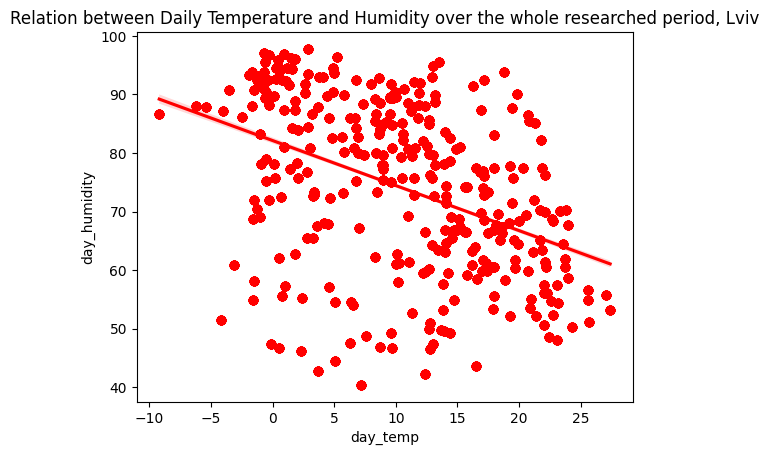

In [24]:
sns.regplot(data = df_Lviv, x = "day_temp", y = "day_humidity", color = "r")
# Give a title to the plot
plt.title("Relation between Daily Temperature and Humidity over the whole researched period, Lviv")
plt.show()

#### \*Here it can be seen that data is representational because linear regression corresponds to the well-known observations: with the increasing of air temperature, humidity indicator becomes lower because of evaporation of moisture from the air under the influence of high temperature

### Define a function which removes rows from the dataframe *df* that have duplicate values in a specified column *column_to_delete*, returns a renewed dataframe *df*

In [25]:
def remove_duplicates(df, column_to_delete):
    df = df.drop_duplicates(subset = column_to_delete, keep = 'first')
    return df
df_Lviv = remove_duplicates(df_Lviv, 'day_datetime')
df_Lviv


,city_latitude,city_longitude,city_resolvedAddress,city_address,city_timezone,city_tzoffset,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,...,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,hour_icon,hour_source,hour_stations
142992,49.8444,24.0254,"Львів, Україна","Lviv,Ukraine",Europe/Kyiv,2.0,2022-02-24,1645653600,6.0,0.0,...,10.0,89.0,0.0,NaN,0.0,10.0,Partially cloudy,partly-cloudy-night,obs,UKLL;33393099999
143016,49.8444,24.0254,"Львів, Україна","Lviv,Ukraine",Europe/Kyiv,2.0,2022-02-25,1645740000,7.0,-2.0,...,10.0,44.6,0.0,NaN,0.0,10.0,Partially cloudy,partly-cloudy-night,obs,UKLL;33393099999
143040,49.8444,24.0254,"Львів, Україна","Lviv,Ukraine",Europe/Kyiv,2.0,2022-02-26,1645826400,6.0,-4.0,...,4.0,44.6,0.0,NaN,0.0,10.0,Partially cloudy,partly-cloudy-night,obs,UKLL;33393099999
143064,49.8444,24.0254,"Львів, Україна","Lviv,Ukraine",Europe/Kyiv,2.0,2022-02-27,1645912800,4.0,-5.0,...,10.0,100.0,0.0,NaN,0.0,10.0,Overcast,cloudy,obs,UKLL;33393099999
143088,49.8444,24.0254,"Львів, Україна","Lviv,Ukraine",Europe/Kyiv,2.0,2022-02-28,1645999200,2.6,-4.0,...,10.0,69.8,0.0,NaN,0.0,10.0,Partially cloudy,partly-cloudy-night,obs,UKLL;33393099999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150816,49.8444,24.0254,"Львів, Україна","Lviv,Ukraine",Europe/Kyiv,2.0,2023-01-16,1673820000,3.0,0.4,...,4.1,100.0,0.0,NaN,0.0,10.0,Overcast,snow,obs,remote
150840,49.8444,24.0254,"Львів, Україна","Lviv,Ukraine",Europe/Kyiv,2.0,2023-01-17,1673906400,5.7,0.4,...,24.1,90.6,0.0,NaN,0.0,10.0,Overcast,cloudy,obs,remote
150864,49.8444,24.0254,"Львів, Україна","Lviv,Ukraine",Europe/Kyiv,2.0,2023-01-18,1673992800,8.9,2.2,...,22.4,100.0,0.0,NaN,0.0,10.0,Overcast,cloudy,obs,remote
150888,49.8444,24.0254,"Львів, Україна","Lviv,Ukraine",Europe/Kyiv,2.0,2023-01-19,1674079200,4.7,-0.6,...,24.1,100.0,0.0,NaN,0.0,10.0,Overcast,cloudy,obs,remote


### Define a function that indicated month name by its number *month* and returns str object with month name

In [26]:
def indicate_month_name(month):
    if month == 1:
        return 'January'
    elif month == 2:
        return 'February'
    elif month == 3:
        return 'March'
    elif month == 4:
        return 'April'
    elif month == 5:
        return 'May'
    elif month == 6:
        return 'June'
    elif month == 7:
        return 'July'
    elif month == 8:
        return 'August'
    elif month == 9:
        return 'September'
    elif month == 10:
        return 'October'
    elif month == 11:
        return 'November'
    else:
        return 'December'

### Define a function that checks value of month in *day_datetime* column, and then adds a corresponding str object value to column *month_name* 

In [27]:
def add_names_column(df):
    months_column = []
    for date in df['day_datetime']:
        month_by_number = date.month
        months_column.append(indicate_month_name(month_by_number))
    months_names = pd.Series(months_column)
    return months_names
#create a new column in dataframe for Kharkiv city
names_column = add_names_column(df_Kharkiv)
df_Kharkiv['month_name'] = names_column.values
df_Kharkiv.head()

/var/folders/_r/dhhfdyx50yl7vdrqvy8l310c0000gn/T/ipykernel_51245/949549570.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Kharkiv['month_name'] = names_column.values


,city_latitude,city_longitude,city_resolvedAddress,city_address,city_timezone,city_tzoffset,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,...,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,hour_icon,hour_source,hour_stations,month_name
71496,50.0042,36.2358,"Харків, Україна","Kharkiv,Ukraine",Europe/Kyiv,2.0,2022-02-24,1645653600,5.0,-4.0,...,1.5,0.0,NaN,0.0,10.0,Clear,clear-night,obs,UKHH;UUOB;34300099999,February
71497,50.0042,36.2358,"Харків, Україна","Kharkiv,Ukraine",Europe/Kyiv,2.0,2022-02-24,1645653600,5.0,-4.0,...,1.5,0.0,NaN,0.0,10.0,Clear,clear-night,obs,UKHH;UUOB;34300099999,February
71498,50.0042,36.2358,"Харків, Україна","Kharkiv,Ukraine",Europe/Kyiv,2.0,2022-02-24,1645653600,5.0,-4.0,...,40.2,0.0,NaN,0.0,10.0,Partially cloudy,partly-cloudy-night,obs,UKHH;UUOB;34300099999,February
71499,50.0042,36.2358,"Харків, Україна","Kharkiv,Ukraine",Europe/Kyiv,2.0,2022-02-24,1645653600,5.0,-4.0,...,0.0,0.0,NaN,0.0,10.0,Clear,clear-night,obs,UKHH;UUOB;34300099999,February
71500,50.0042,36.2358,"Харків, Україна","Kharkiv,Ukraine",Europe/Kyiv,2.0,2022-02-24,1645653600,5.0,-4.0,...,0.0,0.0,NaN,0.0,10.0,Clear,clear-night,obs,UKHH;UUOB;34300099999,February


### Create a lineplot to describe precipitation indicator fluctuations in Kharkiv for the whole researched period

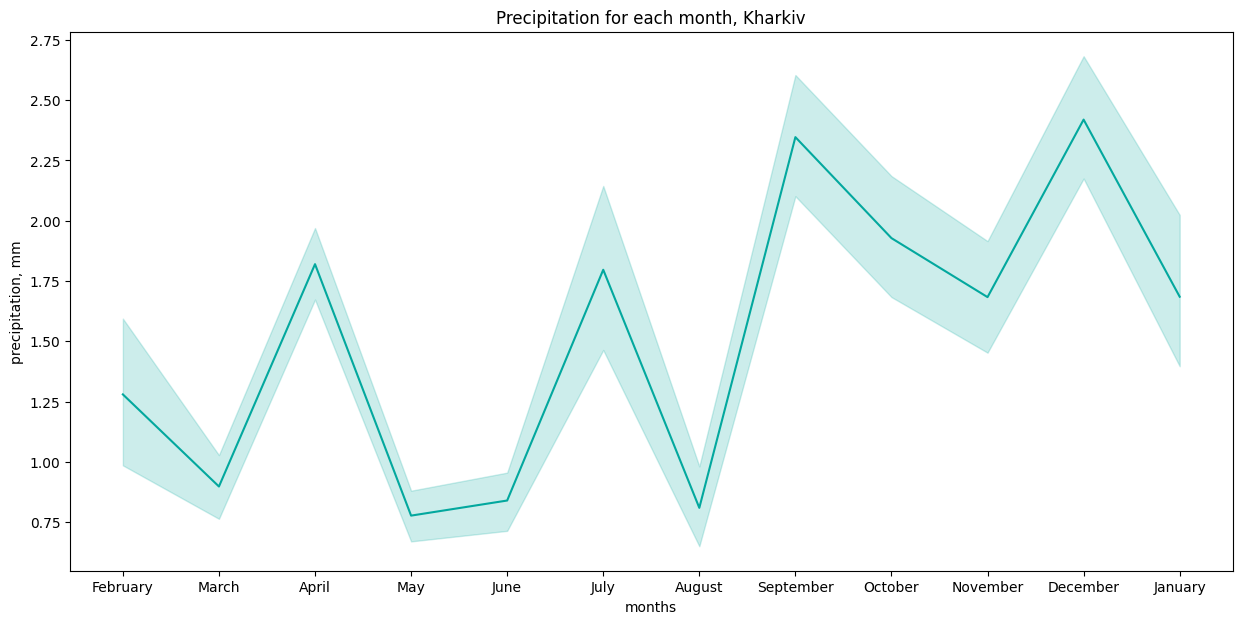

In [28]:
plt.figure(figsize=(15,7))
sns.lineplot(data = df_Kharkiv, x = 'month_name', y = 'day_precip', color = '#03A89E')
plt.xlabel('months')
plt.ylabel('precipitation, mm')
plt.title('Precipitation for each month, Kharkiv')
plt.show()

### Clean cities' dataframes by leaving rows that corresponds to 1st day of the month only (for February, 2022, 24th of February counts as a 1st day)

In [30]:
#убирает дублированніе значения по датам с датафрейма по николаеву
df_Mykolaiv = remove_duplicates(df_Mykolaiv, 'day_datetime')
names_column_Mykolaiv = add_names_column(df_Mykolaiv)
df_Mykolaiv['month_name'] = names_column_Mykolaiv.values
#df_Mykolaiv.sample(15)
df_Kyiv = remove_duplicates(df_Kyiv, 'day_datetime')
names_column_Kyiv = add_names_column(df_Kyiv)
df_Kyiv['month_name'] = names_column_Kyiv.values
#df_Kyiv
df_Lviv = remove_duplicates(df_Lviv, 'day_datetime')
names_column_Lviv = add_names_column(df_Lviv)
df_Lviv['month_name'] = names_column_Lviv.values
#вынести верхний кусок куда то отсюда 

df_Kyiv = remove_duplicates(df_Kyiv, 'month_name')
#df_Kyiv['day_cloudcover'].values

df_Lviv = remove_duplicates(df_Lviv, 'month_name')
#df_Lviv['day_cloudcover'].values

df_Mykolaiv = remove_duplicates(df_Mykolaiv, 'month_name')
#df_Mykolaiv['day_cloudcover'].values

df_Kharkiv = remove_duplicates(df_Kharkiv, 'month_name')
#df_Kharkiv['day_cloudcover'].values

### Create a plot of fluctiations of cloudcover indicator in 4 cities for the whole researched period

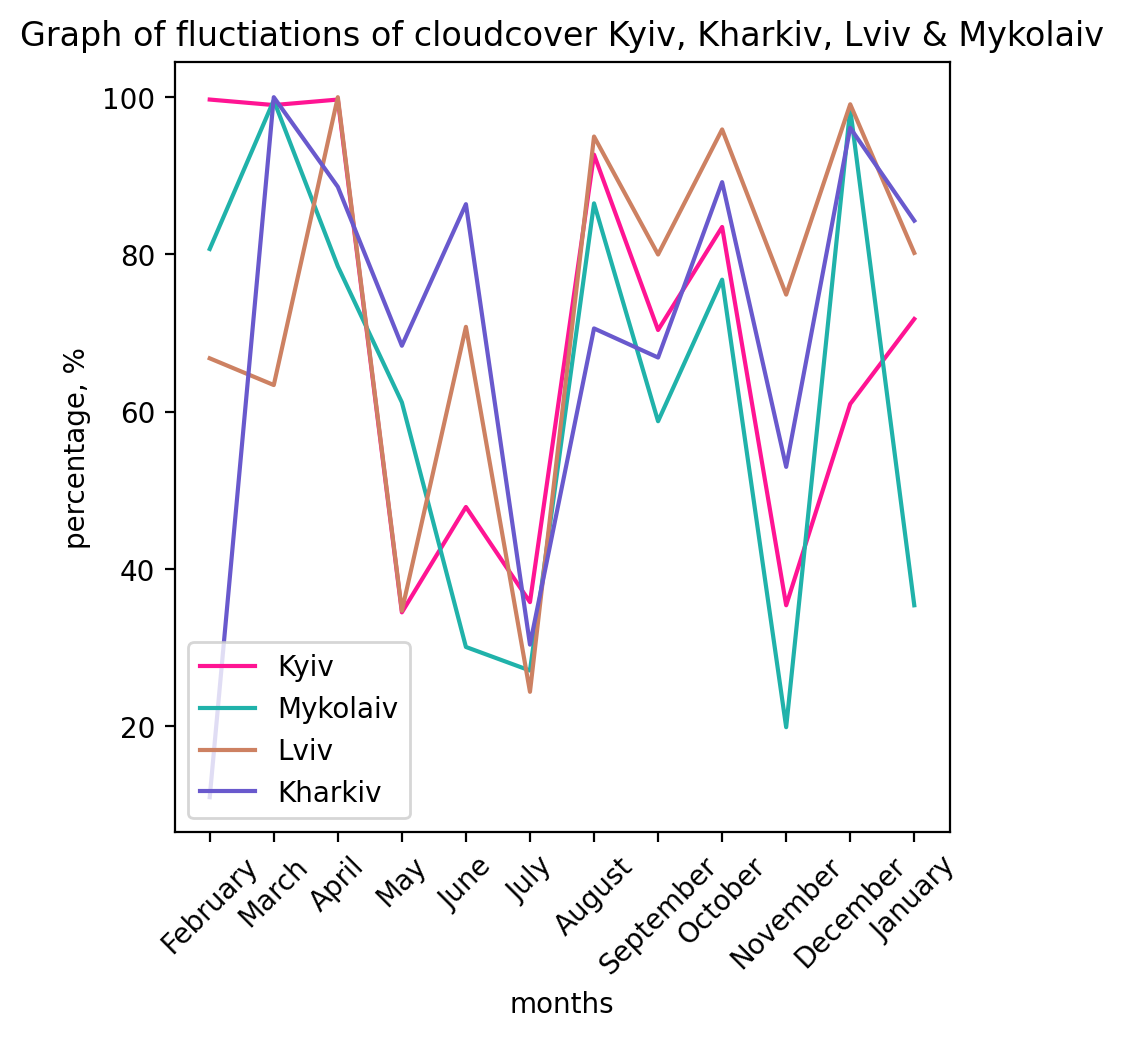

In [46]:
x_Kyiv = df_Kyiv['month_name']
y_Kyiv = df_Kyiv['day_cloudcover']


plt.figure(figsize=(5, 5), dpi=200)
plt.plot(x_Kyiv, y_Kyiv, '#FF1493', label = 'Kyiv')

x_Mykolaiv = df_Mykolaiv['month_name']
y_Mykolaiv = df_Mykolaiv['day_cloudcover']


plt.plot(x_Mykolaiv, y_Mykolaiv, '#20B2AA', label = 'Mykolaiv')

x_Lviv = df_Lviv['month_name']
y_Lviv = df_Lviv['day_cloudcover']


plt.plot(x_Lviv, y_Lviv, '#CD8162', label = 'Lviv')

x_Kharkiv = df_Kharkiv['month_name']
y_Kharkiv = df_Kharkiv['day_cloudcover']

plt.plot(x_Kharkiv, y_Kharkiv, '#6959CD', label = 'Kharkiv')

plt.xlabel("months")
plt.xticks(rotation = 45)
plt.ylabel("percentage, %")
plt.title("Graph of fluctiations of cloudcover Kyiv, Kharkiv, Lviv & Mykolaiv")
#plt.figure(figsize = (7, 7)) 
plt.legend()
# Show the graph
plt.show()

### Temperature chart in Mykolaiv on the first day of each month

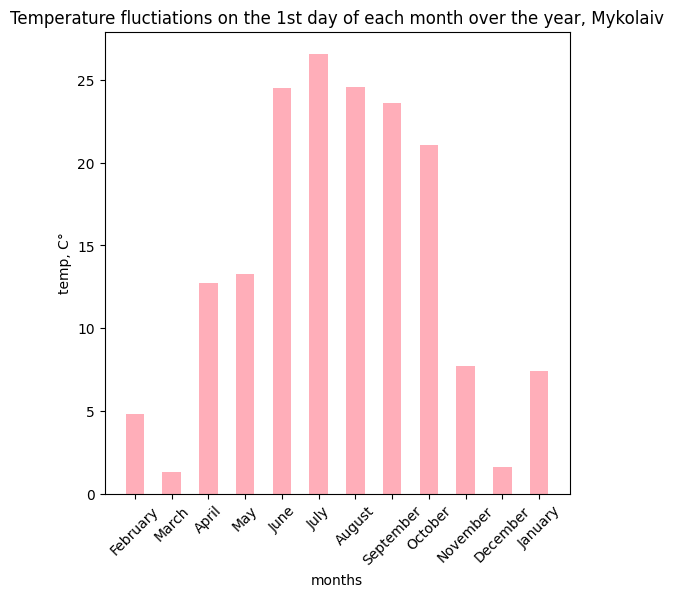

In [40]:
# график температур в Николаеве в первый день каждого месяца (февраль 22 года начинается з 24 числа)
x_axis = df_Mykolaiv['month_name']
y_axis = df_Mykolaiv['day_temp']
  
fig = plt.figure(figsize = (6, 6))
 
# creating the bar plot
plt.bar(x_axis, y_axis, color = '#FFAEB9',
        width = 0.5)
plt.xticks(rotation = 45)
 
plt.xlabel("months")
plt.ylabel("temp, C°")
plt.title("Temperature fluctiations on the 1st day of each month over the year, Mykolaiv")
plt.show()